
- Name: Shaun Clarke
- Course: CSC6313 Ai Foundations
- Instructor: Margaret Mulhall
- Module: 5
- Assignment: The Diagnostic Prediction Engine

In this project, you will develop a supervised machine learning pipeline to predict patient health outcomes using Scikit-Learn.
You will transition from "Classical ML" theory to a functional Python implementation that handles data generation, cleaning, model training, and real-time inference.


# Importing dependencies

In [2]:
from typing import Dict, List, Tuple
# Numpy will be used to generate the fake patient health data
import numpy as np
# Pandas will be used to organize and manipulate the data, similar to hwo we would and excel sheet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the style for a more better looking plot
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Setting default figure size as well
# train_test_split will be used to  spli the data into training(train the model) and testing(evaluate the model)
from sklearn.model_selection import train_test_split
# StandardScaler transform features so they have a (z-score) mean of 0 and an std of 1. This standardizes the features and helps the model perform better.
# Polynomialfeatures Wil be used to create more features by squarring or multiplying existing ones. The downside is, too many of them can cause the model to become too complex and can cause overfitting
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# SimpleImputer will be used to handle filling in missing values in the dataset
from sklearn.impute import SimpleImputer
# LinearRegression is the algorithm that we will be using the find the line that best fits the data for us to make predictions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# The mean_squared_error will be used to tell us, on average how far off the models predictions are from the actual values. Lower is better
# The r2_score will be used to tell us how much of the variation in the data is the model explaining to us. Higher is better
from sklearn.metrics import r2_score, mean_absolute_error
# Wil be used to suppress warnings
import warnings

# Supperessing warnings to comply with Rubric Zero Warning Policy
warnings.filterwarnings("ignore")

# Generating the fake data
- Automated Dataset: Your script must programmatically generate a synthetic dataset and save it as patient_health_data.csv in your Current Working Directory (CWD).

- Schema: The CSV must contain at least 500 rows with the features: age, bmi, blood_sugar_level, and a target health_risk_score.

### This section is mainly numpy

## Generating a target health_risk_score
So i will attempt to use a linear regressions tyle formula to generate the risk score
health_risk_scodre = w1*age_factor + w2*bmi_factor + w3*blood_sugar_factor + (some randomness to make it real)
Each feature has been given different weights to determine how much it impacts the risk score, the higher the weight the more impact that feature will have
age weight: 0.5, bmi weight: 2, blood sugar weight: 0.3
The idea is health_risk_scodre = (age_factor * 0.5) + ((bmi_factor - 25) * 2) + ((blood_sugar_factor 90) * 0.3) + (some randomness to make it real). combine all that
### age
(age_factor * 0.5): if a patient is 60, 60 * 0.5=30 or if patient was 40, 40 * 0.5=20
0.5 is jsut a weight, it determines how important age is. so age would contribue the result as points to risk score. 0.5 allows age to increase risk but not too aggresively

### bmi
a quick google revelaed that a healthy bmi is 18.5 to 24.9. 25 being the upper boundry of a healthy bmi seems like a good baseline to use. anything above increases risk, anything below decreases risk.
2 is a weight that controls the strenght of the relationship meaning, this determines how big of an impact the bmi will have on the risk score. I want bmi to be amajor factor in predicting risk score
((bmi_factor - 25) * 2): if a patients bmi is 30, (30 - 25) * 2=10 increases risk by 10 points, or patient's bmi is 22, (22 - 25) * 2 = -6 reduces risk by 6 points

### blood sugar
another wuick google revealed that a healthy blood sugar level is 99mg/dL and below. With my range being 70-100 90 seemed like a good baseline. anything below is healthy and anything above is increased risk, anything less is below.
o.3 is the weight used for the blood sugar to controls th eimpact it has on the risk score. blood sugar will have a very mild impact on risk score
((blood_sugar_factor 90) * 0.3): if a patient's blood sugar is 110, (110 - 90) * 0.3=6 increases risk score by 6 ponts, if the patients blood sugar is 85, (85 - 90) * 0.3 = -1.5 reduces risk slighly by 1.5 points.

### adding randomness
using np.random.normal(0, 10, n_samples) to add randomness so not everyone with similar ages have the same risk and so on

In [3]:
from sys import flags
# This helper function helps generate the mean and the std used to generate each feature
def get_mean_std(min_range: int, max_range: int) -> Tuple[str, str]:
  """
  This function helps generate the mean and the std used to generate each feature
  min_range: low end of the range
  max_range: hgih end of the range
  returns: returns mean and standard deviation
  """
  # List of min and max range
  range: List = [min_range, max_range]
  # Count the number of items in the range list
  count: int = len(range)
  # calculating mean of the range
  mean: int = (min_range + max_range)/count
  # calculating standard deviation. std is distance from mean
  std_dev: int = (max_range - mean)/count

  return mean, std_dev

# This function generates the fake patient data
def generate_patient_data(n_samples: int =500, random_state: int =42) -> pd.DataFrame:
  """
  This function generates the fake patient data
  n_amples: number of patient records to generate
  random_state: The number to start from when generating patient data so it generates the same data each time
  returns: Returns a dataframe of the generated data
  """

  # Setting random seed as the random_state we defined so the same data is genearated every time
  np.random.seed(random_state)
  # Generating the age feature using the age range 20-80
  min_age: int = 20
  max_age: int = 80
  # Getting mean and std
  mean_age, age_std_dev = get_mean_std(min_age, max_age)
  age: int = np.random.normal(mean_age, age_std_dev, n_samples)

  # generating the bmi feature: A healthy bmi is about 18-30,
  min_bmi: int = 18
  max_bmi: int = 30
  mean_bmi, bmi_std_dev = get_mean_std(min_bmi, max_bmi)
  # print(mean_bmi, bmi_std_dev)
  bmi = np.random.normal(mean_bmi, bmi_std_dev, n_samples)

  # generating the blood sugar level feature: normal fasting blood sugar is 70-100 mg/dL
  min_blood_sugar: int = 70
  max_blood_sugar: int = 100
  mean_blood_sugar, blood_sugar_std_dev = get_mean_std(min_blood_sugar, max_blood_sugar)
  # print(mean_blood_sugar, blood_sugar_std_dev)
  blood_sugar_level: np.ndarray = np.random.normal(mean_blood_sugar, blood_sugar_std_dev, n_samples)
  # print(blood_sugar_level)

  """
  So i will attempt to use a linear regressions tyle formula to generate the risk score
  health_risk_scodre = w1*age_factor + w2*bmi_factor + w3*blood_sugar_factor + (some randomness to make it real)
  Each feature has been given different weights to determine how much it impacts the risk score, the higher the weight the more impact that feature will have
  age weight: 0.5, bmi weight: 2, blood sugar weight: 0.3
  The idea is health_risk_scodre = (age * 0.5) + ((bmi - 25) * 2) + ((blood_sugar_level - 90) * 0.3) + np.random.normal(0, 10, n_samples). combine all that

  (age * 0.5): if a patient is 60, 60 * 0.5=30 or if patient was 40, 40 * 0.5=20
  0.5 is jsut a weight, it determines how important age is. so age would contribue the result as points to risk score. 0.5 allows age to increase risk but not too aggresively

  a quick google revelaed that a healthy bmi is 18.5 to 24.9. 25 being the upper boundry of a healthy bmi seems like a good baseline to use. anything above increases risk, anything below decreases risk.
  2 is a weight that controls the strenght of the relationship meaning, this determines how big of an impact the bmi will have on the risk score. I want bmi to be amajor factor in predicting risk score
  ((bmi - 25) * 2): if a patients bmi is 30, (30 - 25) * 2=10 increases risk by 10 points, or patient's bmi is 22, (22 - 25) * 2 = -6 reduces risk by 6 points

  another wuick google revealed that a healthy blood sugar level is 99mg/dL and below. With my range being 70-100 90 seemed like a good baseline. anything below is healthy and anything above is increased risk, anything less is below.
  o.3 is the weight used for the blood sugar to controls th eimpact it has on the risk score. blood sugar will have a very mild impact on risk score
  ((blood_sugar_level 90) * 0.3): if a patient's blood sugar is 110, (110 - 90) * 0.3=6 increases risk score by 6 ponts, if the patients blood sugar is 85, (85 - 90) * 0.3 = -1.5 reduces risk slighly by 1.5 points.

  using np.random.normal(0, 10, n_samples) to add randomness so not everyone with similar ages have the same risk and so on

  """
  # Creating a health risk score based on the features. Thanks to numpy arrays perfomring element-wise operations, everything in the generated feature arrays will be multiplied by the weights
  health_risk_score: int = ((age * 0.5) + ((bmi - 25) * 2) + ((blood_sugar_level - 90) * 0.3) + np.random.normal(0, 10, n_samples))
  # print(health_risk_score)


  # Punching holes in the data set my creating missing values. I will do this to roughly 10% of the patients.
  # So for each feature i will randomly select 10 positions and replace that value with NaN.
  # Numpy allows what is called advanced indexing where it allows you to pass and array of indices to a numpy array.
  # You are basically saying, go get all the positions listed in the array being passed in and replace their values with np.nan
  # I will use this formula to randomly grab 10% of the indices from the features i generated earlier
  missing_indices = np.random.choice(n_samples, size=n_samples//10, replace=False) # n_samples: number of patients, size=n_samples//10: grab 10% of the indices from the feature, replace=False: Choose each index only once
  # adding missing values to age
  age[missing_indices] = np.nan
  # adding missing values to bmi
  bmi[missing_indices] = np.nan
  # adding missing values to blood_sugar_level
  blood_sugar_level[missing_indices] = np.nan

  # Using the generated features and target to create a dataframe
  generated_data: pd.DataFrame = pd.DataFrame({
      "age": age,
      "bmi": bmi,
      "blood_sugar_level": blood_sugar_level,
      "health_risk_score": health_risk_score
  })

  return generated_data

# Generating the patient data
df: pd.DataFrame = generate_patient_data()

# Outputting the generated data to a CSV in the cwd
df.to_csv('patient_data.csv', index=False)


# Preprocessing & Clean Output aka Data Loading and Exploration
### This section is mainly Pandas
- The idea here is to get an idea of the data we are working with.Sure we generated it but normally you don't. So you want to know number of columns, data types etc.

In [4]:
# Loading patient data csv that was generated earlier
df: pd.DataFrame = pd.read_csv("patient_data.csv")
df.head(5)


,age,bmi,blood_sugar_level,health_risk_score
0,57.450712,26.778533,95.495166,41.714582
1,NaN,NaN,NaN,28.488086
2,59.715328,19.804297,85.447228,9.918438
3,72.845448,25.688908,80.147974,34.811187
4,46.487699,22.048072,90.236675,15.709151


In [5]:
# Getting the some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                450 non-null    float64
 1   bmi                450 non-null    float64
 2   blood_sugar_level  450 non-null    float64
 3   health_risk_score  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [6]:
# Getting a statistical breakdown of the data set. This will allow to see details ffro each column like: mean, std, min, max etc.
df.describe()


,age,bmi,blood_sugar_level,health_risk_score
count,450.000000,450.000000,450.000000,500.000000
mean,49.566594,24.119205,85.748412,22.318211
std,14.533807,2.950976,7.638456,13.782963
min,1.380990,15.909340,63.278085,-30.626617
25%,39.309786,22.171096,80.465289,13.827991
50%,49.759922,24.140753,85.785912,21.669860
75%,59.170247,26.039491,90.507388,30.866117
max,107.790972,31.897146,104.512623,61.475174


In [7]:
# Counting how many mising values each column has
df.isnull().sum()

,0
age,50
bmi,50
blood_sugar_level,50
health_risk_score,0


- The following features age, bmi and blood_sugar_levels each have 50 missing values each.
- The health risk score has a range of -30.6-61.4
- The statistical breakdown of the data does look realistic, but i also see that some of the ranges i selected for the featuers werent hard boundaries.
overall the parameters i chose worked, but normal distribution doesn't seem to respect those boundaries.

# Data Preprocessing and Clean Output
We have to clean the raw data before we can use it to train the model.
This helps us to do a few things:
- remove a lot of noise.
- performing imputation to replace missing values because the model cannot train on empty values.
- using standardization to scale all features to comparable ranges. This basically levels the playing field, so individual values from the featuers cannot skew the data

In [8]:
# Creating a df for the X feature matrix that has all columns execept the health risk score
X: pd.DataFrame = df[["age", "bmi", "blood_sugar_level"]]
X

,age,bmi,blood_sugar_level
0,57.450712,26.778533,95.495166
1,NaN,NaN,NaN
2,59.715328,19.804297,85.447228
3,72.845448,25.688908,80.147974
4,46.487699,22.048072,90.236675
...,...,...,...
495,58.083651,23.156699,100.045697
496,34.441308,29.393060,100.461277
497,47.144920,25.922529,94.062747
498,NaN,NaN,NaN


In [9]:
# Creating a df for Y target vector that only has the health risk score column
Y: pd.DataFrame = df["health_risk_score"]
Y


,health_risk_score
0,41.714582
1,28.488086
2,9.918438
3,34.811187
4,15.709151
...,...
495,39.070435
496,28.879943
497,17.817595
498,12.179260


##### The next cell is splitting the data into training and testing sets. The rule of thumb is, 80% of the data for training and 20% for testing. To prevent data leakage, the model must never see the testing data during training.
- test_size=0.2 means 20% for testing, and the other 80 for training.
- random_state ensures the same split every time.

In [10]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Making sure the split was succesfult and we have our 80% train and 20% test data
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.0f}%)")

Training set size: 400 samples (80%)
Test set size: 100 samples (20%)


##### Below is where median imputation is used to hadle the missing values we simulated when generating the data.
This is because machine learning models cant handle missing values. So median imputation replaces missing values with the median value of the column where the data is mising from. We use the median instead of the mean because it is less affected by the various values in the data and skewed distribution.

We will also fit StandarScaler and SimpleImputer on the training data. The learned values that we get from the training data(mean, median std) will be applied to both training and test data using transform.

We only fit on the training data, because under no circumstances can the model see the test data set.

In [11]:
# Creating a simpleImputer object that replaces the missing values with the median of each column
imputer: SimpleImputer = SimpleImputer(strategy="median")
# Fitting(using the training data to calculate the median values) the imputer on the training data and transforming(using the learned median values to replace missing data) the training data in one shot with fit_transform
X_train_imputed: np.ndarray = imputer.fit_transform(X_train)
# type(X_train_imputed)
# X_train_imputed
# Using teh same imputer from ealier to transform the test data.
# The imputer retained the learned values(mean, median, std). Because we cannot expose the test data, we will only transform(fill the missing values in the test data) and not fit
X_test_imputed: np.ndarray = imputer.transform(X_test)

# Doing some data diagnostics to make sure we accomplished our imputation goal.
# We will transform the np array back to a dataframe so we can use isnull then get the sum for the number of missing values in each column, then the sum of all those missing value totals.
print(f"Training data missing values before: {pd.DataFrame(X_train).isnull().sum().sum()}")
print(f"Training data missing values after: {pd.DataFrame(X_train_imputed).isnull().sum().sum()}")
print(f"Test data missing values before: {pd.DataFrame(X_test).isnull().sum().sum()}")
print(f"Test data missing values after: {pd.DataFrame(X_test_imputed).isnull().sum().sum()}")

Training data missing values before: 117
Training data missing values after: 0
Test data missing values before: 33
Test data missing values after: 0


# The cell below is where we will use Z-score scaling to standardize our data
Features have different scales/ranges that can confuse the model. Meaning, it might see a higher number for a feature and thinks the larger numbers make it more important than the others. So standardization/Z-score scaling levels the playing field by changing every forature so that mean=0 and std=1. So now all features are measured in the distance they are from their mean(average) and not their original units.
The Z-score formula is: z = (x - mean)/std
This make slearning smoother because the models that use gradient descent or distance calculations, so scaled featuers makes the process more efficient.

In [12]:
# Creating the standardsclaer object
scaler = StandardScaler()
# Fitting(using the training data to calculate the mean and std) the scaler to the training data and transforming(using the values calucaled during fitting to scale the data(mean=0, std=1)) it.
X_train_scaled: np.ndarray = scaler.fit_transform(X_train_imputed)
# print(X_train_scaled)
# Using the same scaler with the already calculated mean and std t transform the teest data
X_test_scaled: np.ndarray = scaler.transform(X_test_imputed)

# Doing some data diagnostics to make sure we accomplished our standardization goal.
print(f"\nAfter standardization on the training data:")
# Truning the standardized numpy array back into a dataframe, and adding the columns from the original dataframe we created above X, hence columns = X.columns
print(f"{pd.DataFrame(X_train_scaled, columns=X.columns).describe()}")
print("\nThe Mean does = 0 for all features. After doing some digging i learned that is the way pandas .describe() rounds the floating point numbers")
print("\nStd does = 1 for all features. Againg had to find out why the number wasnt exactly one. Turns our pandas .describe() uses sample std")

print("\nPreprocessing complete!")
print(f"Final training data shape: {X_train_scaled.shape}")
print(f"Final test data shape: {X_test_scaled.shape}")



After standardization on the training data:
                age           bmi  blood_sugar_level
count  4.000000e+02  4.000000e+02       4.000000e+02
mean  -6.439294e-16 -3.685940e-16       1.665335e-15
std    1.001252e+00  1.001252e+00       1.001252e+00
min   -2.816266e+00 -2.978641e+00      -2.983378e+00
25%   -6.979802e-01 -6.380446e-01      -6.691440e-01
50%    3.355776e-03  6.557133e-03      -2.278451e-02
75%    6.041774e-01  6.052921e-01       5.568102e-01
max    3.399503e+00  2.858143e+00       2.595435e+00

The Mean does = 0 for all features. After doing some digging i learned that is the way pandas .describe() rounds the floating point numbers

Std does = 1 for all features. Againg had to find out why the number wasnt exactly one. Turns our pandas .describe() uses sample std

Preprocessing complete!
Final training data shape: (400, 3)
Final test data shape: (100, 3)


 # The Bias-Variance Challenge
 I this section we will be building three models.
 - Underfit (High Bias): A model using only one input feature.
   - he idead here is to see the high bias tradeoff of an oversimplified model.
 - Overfit (High Variance): A model using PolynomialFeatures with a degree of 10 or higher.
   - The idea here is to see the high variance tradeoff of an overly complex model that uses 10+ polynomial features.
 - Optimal: A Multiple Linear Regression model using all three scaled features.
   - The idea here is to practical application of the goldilocks model, not too simple and not too complex.

In [13]:
# Underfit (High Bias): A model using only one input feature.

# Getting the first feature, age from the standardized training data set, : means we want all rows and 0:1 means slice the first column only
X_train_underfit: np.ndarray = X_train_scaled[:, 0:1]
# X_train_underfit
# Getting the feature age, from the standardized test data set, Same method as above : means we want all rows and 0:1 means slice the first column only
X_test_underfit: np.ndarray = X_test_scaled[:, 0:1]

# Taking a look at the shape of the data to make sure we were seuccessful at extracting only the age feature.
print(f"Underfit training data shape: {X_train_underfit.shape}")
print(f"Underfit test data shape: {X_test_underfit.shape}")

# Initializing the linear regression model
model_underfit: LinearRegression = LinearRegression()
# Training the model aka fitting it to the data. So the linearregresion model is trying to find the best weights/coefficients for each feature
model_underfit.fit(X_train_underfit, Y_train)

# Making predictions on the training data
y_train_pred_underfit = model_underfit.predict(X_train_underfit)
# Making predictions on the test data
y_test_pred_underfit = model_underfit.predict(X_test_underfit)
# Calculating teh training data's mean squared error: y_true is the original Y_train dataset and y_pred is the y_train_pred_underfit dataset
train_mse_underfit = mean_absolute_error(Y_train, y_train_pred_underfit)
# Calculating the test data's mean squared error: y_true is the original Y_test dataset and y_pred is the y_test_pred_underfit dataset
test_mse_underfit = mean_absolute_error(Y_test, y_test_pred_underfit)
# calculating the R squared score for the training dataset:y_true is the original Y_train dataset and y_pred is the y_train_pred_underfit dataset
train_r2_underfit = r2_score(Y_train, y_train_pred_underfit)
# calculating the R squared score for the testing dataset:y_true is the original Y_test dataset and y_pred is the y_test_pred_underfit dataset
test_r2_underfit = r2_score(Y_test, y_test_pred_underfit)

# Display results
print("\n" + "=" * 60)
print("MODEL 1 RESULTS - UNDERFIT MODEL")
print("=" * 60)
print(f"Training MSE: {train_mse_underfit:.2f}")
print(f"Test MSE:     {test_mse_underfit:.2f}")
print(f"Training R squared:  {train_r2_underfit:.4f}")
print(f"Test R squared:      {test_r2_underfit:.4f}")


Underfit training data shape: (400, 1)
Underfit test data shape: (100, 1)

MODEL 1 RESULTS - UNDERFIT MODEL
Training MSE: 8.99
Test MSE:     9.94
Training R squared:  0.2783
Test R squared:      0.2067


Underfit (High Bias) Interpretation:
- The high MSE is telling us that the model has large prediction errors. This means the predictions are far from the true target values.
- The low R Squared values tell us that the model explains only a small portion of the variance in the target variable.
- We can see the scores between train and test are very similar so the model is generalizing consistenly as it should with high bias. But performance wise we can see that the performance is poor and it is underfitting because the model is just too simple.
- This is the prefect example of high bias aka underfitting, because we are using only one input feature

# Overfit (High Variance): A model using PolynomialFeatures with a degree of 10 or higher.

In [14]:

# Creating a polynomial features transformer: Basically create polynomial combination of teh featuers up to the number 10.
# I assumed the professor chose 10 because the higher the degreee the more complex the model will be. Which means a lower bias and higher variance.
poly = PolynomialFeatures(degree=10, include_bias=False) # Include_bias is set to false because LinearRegression already adds its own intecept.

# Transforming the training data to polynomial feattuers that go up to the number 10.
X_train_overfit = poly.fit_transform(X_train_scaled)
# Transforming the testing data to polynomial feattuers that go up to the number 10.
X_test_overfit = poly.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Polynomial features: {X_train_overfit.shape[1]}")
print(f"(Degree 10 created {X_train_overfit.shape[1]} features from {X_train_scaled.shape[1]}.)")

# Initializing the linear regression model for the overfitting that is about to come.
model_overfit = LinearRegression()
# # Training the model
model_overfit.fit(X_train_overfit, Y_train)

# Making predictions on the training data
y_train_pred_overfit = model_overfit.predict(X_train_overfit)
# Making predictions on the test data
y_test_pred_overfit = model_overfit.predict(X_test_overfit)
# Calculating teh training data's mean squared error: y_true is the original Y_train dataset and y_pred is the y_train_pred_overfit dataset
train_mse_overfit = mean_absolute_error(Y_train, y_train_pred_overfit)
# Calculating the test data's mean squared error: y_true is the original Y_test dataset and y_pred is the y_test_pred_overfit dataset
test_mse_overfit = mean_absolute_error(Y_test, y_test_pred_overfit)
# calculating the R squared score for the training dataset:y_true is the original Y_train dataset and y_pred is the y_train_pred_overfit dataset
train_r2_overfit = r2_score(Y_train, y_train_pred_overfit)
# calculating the R squared score for the testing dataset:y_true is the original Y_test dataset and y_pred is the y_test_pred_overfit dataset
test_r2_overfit = r2_score(Y_test, y_test_pred_overfit)

# Display results
print("\n" + "=" * 60)
print("MODEL 2 RESULTS - OVERFIT MODEL")
print("=" * 60)
print(f"Training MSE: {train_mse_overfit:.2f}")
print(f"Test MSE:     {test_mse_overfit:.2f}")
print(f"Training R squared:  {train_r2_overfit:.4f}")
print(f"Test R squared:      {test_r2_overfit:.4f}")


Original features: 3
Polynomial features: 285
(Degree 10 created 285 features from 3.)

MODEL 2 RESULTS - OVERFIT MODEL
Training MSE: 3.07
Test MSE:     208436.87
Training R squared:  0.8282
Test R squared:      -16780845294.0734


Overfit (High Variance) Interpretation:
- The very low training MSE is telling us that the model fits the training data very well.
- The rediculously high test MSE shows that the model fails horribly on new data.
- The gap between the train and test performance is pretty big and points to overfitting.
- The high negative test R squared confirms the model cannot even predict the baseline
- This perfectly captures the high variance, showing the models sensitivity to the training data and does generalize.

# Optimal: A Multiple Linear Regression model using all three scaled features.

In [15]:
# For this we will be using all three features from the dataset and no polynomials.
# So it is not tii simple and not too complexed, but just right.

# Creating a linear rehression model for optimal
model_optimal = LinearRegression()
# Training the model on the original scaled dataset that has all features
model_optimal.fit(X_train_scaled, Y_train)

# Making predictions on the training data
y_train_pred_optimal = model_optimal.predict(X_train_scaled)
# Making predictions on the test data
y_test_pred_optimal = model_optimal.predict(X_test_scaled)
# Calculating teh training data's mean squared error: y_true is the original Y_train dataset and y_pred is the y_train_pred_optimal dataset
train_mse_optimal = mean_absolute_error(Y_train, y_train_pred_optimal)
# Calculating the test data's mean squared error: y_true is the original Y_test dataset and y_pred is the y_test_pred_optimal dataset
test_mse_optimal = mean_absolute_error(Y_test, y_test_pred_optimal)
# calculating the R squared score for the training dataset:y_true is the original Y_train dataset and y_pred is the y_train_pred_optimal dataset
train_r2_optimal = r2_score(Y_train, y_train_pred_optimal)
# calculating the R squared score for the testing dataset:y_true is the original Y_test dataset and y_pred is the y_test_pred_optimal dataset
test_r2_optimal = r2_score(Y_test, y_test_pred_optimal)

print("\n" + "=" * 60)
print("MODEL 3 RESULTS - OPTIMAL MODEL")
print("=" * 60)
print(f"Training MSE: {train_mse_optimal:.2f}")
print(f"Test MSE:     {test_mse_optimal:.2f}")
print(f"Training R squared:  {train_r2_optimal:.4f}")
print(f"Test R squared:      {test_r2_optimal:.4f}")


MODEL 3 RESULTS - OPTIMAL MODEL
Training MSE: 7.83
Test MSE:     8.41
Training R squared:  0.4609
Test R squared:      0.4598


Optimal (Balanced) Interpretation:
- The training data error is very low, the test error is slightly higher but very close. This means the model is generalizing very well and there are no large gaps between train and test.
- From the R squared values we can see tha the model explains about 46% of the variance in both the test and training datasets. The values are almost identical, so this confirms the model is perfomring well on new data.

# Evaluation: Display the Mean Squared Error (MSE) and R-squared (R^2) for all three models in the terminal.

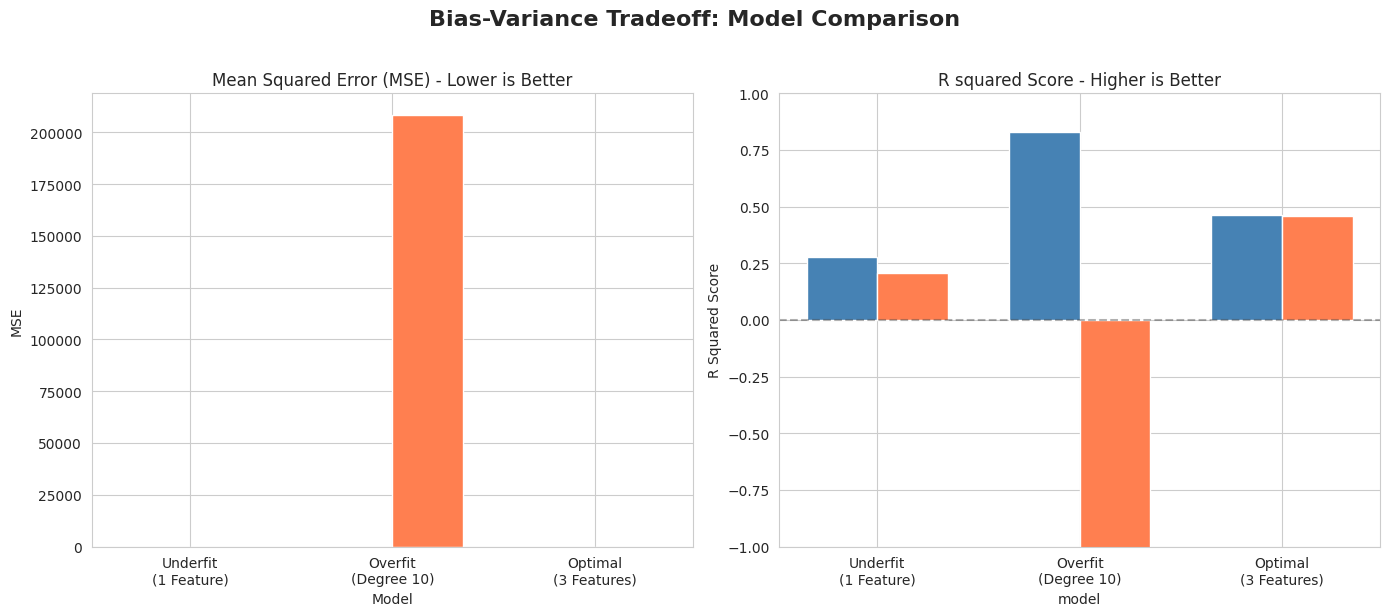

In [28]:
model_names = ["Underfit\n(1 Feature)", "Overfit\n(Degree 10)", "Optimal\n(3 Features)"]

# MSE values for training and test
train_mse_scores = [train_mse_underfit, train_mse_overfit, train_mse_optimal]
test_mse_scores  = [test_mse_underfit,  test_mse_overfit,  test_mse_optimal]

# R squared values for training and test
train_r2_scores = [train_r2_underfit, train_r2_overfit, train_r2_optimal]
test_r2_scores  = [test_r2_underfit,  test_r2_overfit,  test_r2_optimal]

# Creating a figure with one row and two columns of subplost
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle("Bias-Variance Tradeoff: Model Comparison", fontsize=16, fontweight="bold", y=1.02)

# Bar chart setup for MSE comparison. we need to offset bars so they sit side by side
x = np.arange(len(model_names)) # positions for groups
width = 0.35 # width of each bar

# Plotting the training MSE bars on ax1
ax1.bar(x - width/2, train_mse_scores, width, label="Training MSE", color="steelblue")
# Plotting the test MSE bars on ax1
ax1.bar(x + width/2, test_mse_scores, width, label="Test MSE", color="coral")

# Adding labels and formatting to ax1
ax1.set_title("Mean Squared Error (MSE) - Lower is Better")
ax1.set_xlabel("Model")
ax1.set_ylabel("MSE")
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)

# Plotting training R squared bars on ax2
ax2.bar(x - width/2, train_r2_scores, width, label="Training R squared", color="steelblue")
# Plotting test R squared bars on ax2
ax2.bar(x + width/2, test_r2_scores, width, label="Training R squared", color="coral")

# Adding labels and formatting to ax2
ax2.set_title("R squared Score - Higher is Better")
ax2.set_xlabel("model")
ax2.set_ylabel("R Squared Score")
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)
ax2.axhline(y=0, color="black", linestyle="--", alpha=0.3)
ax2.set_ylim(-1, 1)


# Preventing labels from pverlapping
plt.tight_layout()
# Save as image
plt.savefig('bias_variance_tradeoff.png', dpi=150, bbox_inches='tight')
# displaying the chart
plt.show()

In [35]:
# Logistic regression needs a binary target 0 or 1 so we will create the binary targets from y_train and y_test
# Basically converting the target risk scores for y_train(train targets) and y_test(test targets) to a boolean array and cenverting the boolean True, False to ints 1,0.
# This uses the 60 point threshold that is in the requirements. so above 60 is at risk and below 60 is not at risk
y_train_binary = (Y_train >= 60).astype(int)
y_test_binary = (Y_test >= 60).astype(int)

# Creating logistic regression model and training it on the binary train target i just created
# why max_iter=1000: Apparently logistic regression uses an iterative algorithm like gradietn descent.
# the default number of iterations is 100 and is sometimes not enough. If the model cannot converge it will throw warnings.
# Hence why we set it to 1000 to giv ethe model more iterations to converge.
logistic_model: LogisticRegression = LogisticRegression(max_iter=1000)
# Fitting the model
logistic_model.fit(X_train_scaled, y_train_binary)

# This function runs the inference engine. Takes user input and infer whether the patient is at risk or not.
def run_inference():

  print("\n" + "=" * 60)
  print(f"DIAGNOSTIC PREDICTION ENGINE - PATIENT ASSESSMENT")
  print(f"=" * 60)
  print("Enter patient vitals to receive a health risk assessment.")
  print("Type 'quit' at any prompt to exit.\n")

  # This while loop will run until it the user exits the  program
  while True:
    """
    This loop will run until the user types "no" or "quit"
    """
    print("-" * 60)

    try:
      # Colleting age input
      age_input: str = input("Enter patient age (years): ")
      if age_input.lower() == "quit":
        print("Exiting diagnostic engine. Peace Out!")
        break
      # Inputs are strings so we need to covert it to a float
      age: float = float(age_input)
    except ValueError:
      print(f"Invalid input, please enter a number")
      continue

    try:
      # Colleting bmi input
      bmi_input: str = input("Enter patient bmi: ")
      if bmi_input.lower() == "quit":
        print("Exiting diagnostic engine. Peace Out!")
        break
      # Inputs are strings so we need to covert it to a float
      bmi: float = float(bmi_input)
    except ValueError:
      print(f"Invalid input, please enter a number")
      continue

    try:
      # Colleting blood sugar input
      sugar_input: str = input("Enter patient blood sugar level: ")
      if sugar_input.lower() == "quit":
        print("Exiting diagnostic engine. Peace Out!")
        break
      # Inputs are strings so we need to covert it to a float
      blood_sugar: float = float(sugar_input)
    except ValueError:
      print(f"Invalid input, please enter a number")
      continue

    # Creating anumpy array with all user inputs, because the sklearn models expect a 2d input, rows columns.
    patient_data: np.ndarray = np.array([[age, bmi, blood_sugar]])
    # We have to carry out the same imputation and standardization on the input patient data so the model can work with it
    patient_imputed: np.ndarray = imputer.transform(patient_data) # Only transforming because we do not want to train the model on this data.
    # Standardizing data with Z-score scaling
    patient_scaled: np.ndarray = scaler.transform(patient_imputed) # Same thing here Only transforming because we do not want to train the model on this data.

    # Using the optimal linear model from above to predict patients health risk score
    risk_score = model_optimal.predict(patient_scaled)
    # sklearn always returns an array of predictions, even for 1 patient. so we will use [0] to get the actual number and not the array.
    risk_score: float = risk_score[0]
    # print(risk_score)

    # Using the logistic regession on predicting the possibility of the patient being at risk.
    risk_probability = logistic_model.predict_proba(patient_scaled)
    # The output will also be an array of arrays [[prob_class_0, prob_class_1]] and we want the second element of the first array prob_class_1
    risk_probability = (risk_probability[0][1] * 100) # multiplying by 100 to get the percentage

    # Determining the diagnosis by applying the 60 point threshold. Which is like converting a continous health score to a binary diagnosis
    if risk_score >= 60:
      diagnosis = "At Risk"
    else:
      diagnosis = "Healthy"

    print("\n" + "=" * 60)
    print("DIAGNOSTIC RESULTS")
    print("=" * 60)

    print(f"Predicted Health Risk Score: {risk_score:.1f} / 100")
    print(f"Probability of Risk:          {risk_probability:.1f}%")
    print(f"Final Diagnosis:              {diagnosis}")

    another = input("\nAssess another patient? (yes/no): ")
    if another.lower() == "no" or "n":
      break



run_inference()




DIAGNOSTIC PREDICTION ENGINE - PATIENT ASSESSMENT
Enter patient vitals to receive a health risk assessment.
Type 'quit' at any prompt to exit.

------------------------------------------------------------
Enter patient age (years): 20
Enter patient bmi: 25
Enter patient blood sugar level: 80

DIAGNOSTIC RESULTS
Predicted Health Risk Score: 6.1 / 100
Probability of Risk:          0.0%
Final Diagnosis:              Healthy

Assess another patient? (yes/no): n
